<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>CA3</b><br><br>Alireza Karimi</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>



codes for creating random numbers:

In [2]:
import numpy as np, random

def set_seed(seed):
  np.random.seed(seed)
  random.seed(seed)

set_seed(810109203)

# <b><font color='green'>Part1:</font></b> Mean Squared Error

## **1_1: Applications Of Autoencoders**

**1.   Image Compression:**

> Autoencoders can be used for image compression, where the encoder learns to represent the essential features of an image in a compact form in the latent space. This compressed representation can then be decoded to reconstruct the original image.
Anomaly Detection:

**2.   Feature Learning:**

> Autoencoders can be employed for feature learning in various domains. By training on raw data, the encoder learns to extract meaningful features, which can be used as input for downstream tasks like classification.

**3.   Data Denoising:**

> Denoising autoencoders are designed to reconstruct clean data from noisy input. This capability is useful in scenarios where data is corrupted by noise, and the model learns to capture the underlying structure.

**4.   Dimensionality Reduction:**

> Indented Autoencoders are powerful tools for reducing the dimensionality of data. The encoder maps high-dimensional input data to a lower-dimensional latent space, capturing the most relevant information while discarding less important details.block

**5.   Anomaly Detection:**

> Autoencoders are effective for anomaly detection, especially in cases where normal data patterns dominate. During training, the model learns to reconstruct normal data accurately. Anomalies or outliers may result in reconstruction errors, making them stand out

**6.   Speech Recognition:**

> Autoencoders can be used for feature learning in speech recognition systems. By encoding relevant features of audio data, these models contribute to building effective speech recognition systems.


## **1_2: The Reasons of Blurriness in reconstructed images**


The blurriness in reconstructed images from autoencoders is often a result of the lossy compression inherent in the autoencoder process. Autoencoders are trained to represent input data in a lower-dimensional space, and during this process, some information may be lost.

Here are a few reasons why reconstructed images may appear blurry:

**1.   Dimensionality Reduction:**



> Autoencoders aim to capture essential features, discarding some fine details during the compression process.


**2.   Noise and Regularization:**


> Techniques used to prevent overfitting and handle noise can result in smoother representations, contributing to blurriness.


**3.   Loss Function:**



> Minimizing mean squared error (MSE) loss, common in image reconstruction tasks, may prioritize smoother solutions over preserving all fine details.




**4.   Limited Capacity::**



> Autoencoders with a small latent space may struggle to capture all intricate details, prioritizing the most salient features.




## **1_3:**


### **1_3_1:**

In [3]:
from keras.datasets import mnist

(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0

# display(test_images)
# display(len(test_images))
# display(len(test_images[0]))

11490434/11490434 [==============================] - 0s 0us/step


### **1_3_2:**

In [4]:
import tensorflow as tf

autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

# display(reconstructed_images)
# display(len(reconstructed_images))
# display(len(reconstructed_images[0]))

313/313 [==============================] - 2s 5ms/step


### **1_3_3:**

In [5]:
set_seed(810109203)
random_numbers = [random.randint(0, 9999) for _ in range(4)]
recreated_images = [[[]] for _ in range(4)]
original_images = [[[]] for _ in range(4)]

for i, rand_num in enumerate(random_numbers):
  recreated_images[i] = np.array(reconstructed_images[rand_num]).reshape(28,28)
  original_images[i] = np.array(test_images[rand_num]).reshape(28,28)

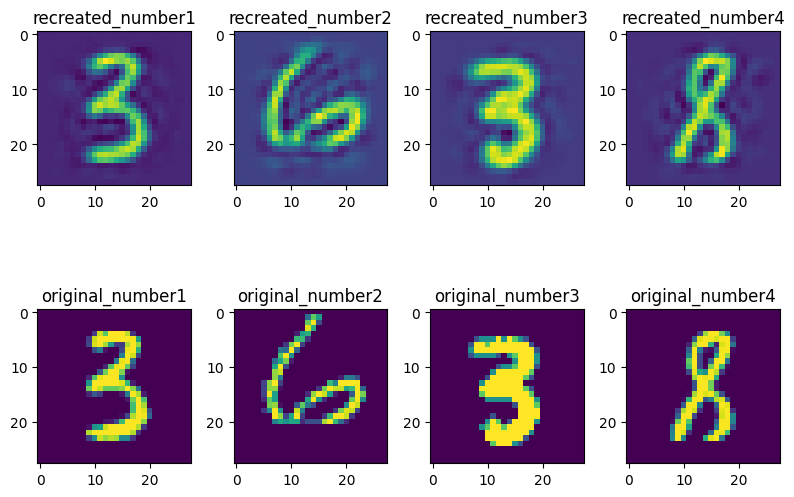

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 6))

axes[0,0].imshow(recreated_images[0])
axes[0,0].set_title('recreated_number1')

axes[0,1].imshow(recreated_images[1])
axes[0,1].set_title('recreated_number2')

axes[0,2].imshow(recreated_images[2])
axes[0,2].set_title('recreated_number3')

axes[0,3].imshow(recreated_images[3])
axes[0,3].set_title('recreated_number4')

axes[1,0].imshow(original_images[0])
axes[1,0].set_title('original_number1')

axes[1,1].imshow(original_images[1])
axes[1,1].set_title('original_number2')

axes[1,2].imshow(original_images[2])
axes[1,2].set_title('original_number3')

axes[1,3].imshow(original_images[3])
axes[1,3].set_title('original_number4')

plt.tight_layout()

plt.show()

### **1_3_4:**

In [7]:
def calc_MSE(test_images, reconstructed_images):
  MSE = np.full(10000, 0.0)
  for i in range(10000):
    original_image = np.array(test_images[i])
    recreated_image = np.array(reconstructed_images[i])
    MSE[i] = np.sum((original_image - recreated_image)**2)
  return MSE

MSE = calc_MSE(test_images, reconstructed_images)
# print(np.sum(MSE)/10000)

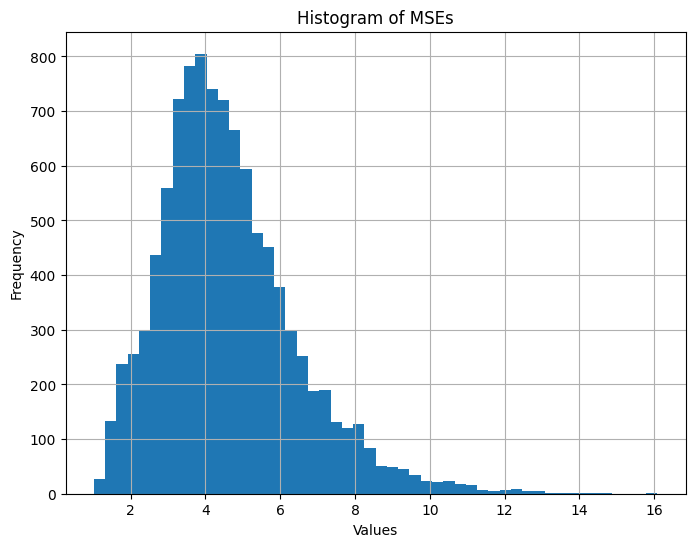

In [8]:
plt.figure(figsize=(8, 6))

plt.hist(MSE, bins=50)

plt.title('Histogram of MSEs')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **1_3_5:**

In [9]:
from scipy import stats

mean = np.mean(MSE)
# display(mean)
std = np.std(MSE)
# display(std)

ks_statistic, p_value = stats.kstest(MSE, cdf='norm', args=(mean, std))
print(f"The p_value is: {p_value}")


The p_value is: 4.5381852339330304e-43


Since our null hypothesis was that our MSEs follow a normal distribution with the calculated mean and std, and the resulting p-value is 4.5e-43 (much less than the common significance level of 0.05), we reject the null hypothesis. This provides strong evidence that the MSEs do not conform to a normal distribution with the specified mean and std.

# <b><font color='green'>Part2:</font></b> Regression & Least Squares


## **2_1: Negative Impacts of Outliers & High Leverage Points**


**Outlier:**



> An outlier is an observation or data point that significantly deviates from the rest of the data in a dataset. In other words, it's a value that is unusually far from the majority of the other values. Outliers can be the result of errors in data collection, measurement variability, or they might indicate a true anomaly in the data. In regression analysis, outliers can strongly influence the estimation of coefficients and affect the overall fit of the model.



**High Leverage Point:**



> A high leverage point is an observation that has an extreme value in at least one predictor variable. These points can strongly influence the estimation of regression coefficients, especially if they fall far from the center of the predictor variable values. High leverage points can have a substantial impact on the shape and orientation of the regression line, potentially leading to significant changes in the model's parameters.



## **2_2: Coefficient of Determination**

#### Explanation:

> The coefficient of determination, denoted as R-squared ($ R^2 $), is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model. In simpler terms, it indicates how well the independent variable(s) explain the variability of the dependent variable.

> R-squared values range from 0 to 1, where 0 indicates that the model does not explain any of the variability of the response data around its mean, and 1 indicates that the model explains all the variability. An R-squared value closer to 1 implies that a larger proportion of the variance in the dependent variable can be explained by the independent variable(s), indicating a better fit of the model.

> In regression analysis, R-squared is used as a measure to assess how well the regression equation represents the data. It is often used to compare different models to determine which one provides a better fit to the data.

#### Formula:

The formula for $ R^2 $ is:

> $$ R^2 = 1 - \frac{\text{Sum of Squared Residuals}}{\text{Total Sum of Squares}} $$

Here's a breakdown of the components in the formula:

**Sum of Squared Residuals (SSR):**
>  This represents the sum of the squared differences between the actual values of the dependent variable and the predicted values by the regression model.

**Total Sum of Squares (SST):**

> This represents the sum of the squared differences between the actual values of the dependent variable and the mean of the dependent variable.




## **2_3:**

In [10]:
x = np.array([-2.3, -1.1, 0.5, 3.2, 4.0, 6.7, 10.3, 11.5])
y = np.array([-9.6, -4.9, -4.1, 2.7, 5.9, 10.8, 18.9, 20.5])
xo, yo = 5.8, 31.3
xl, yl = 20.4, 14.1
xol, yol = 20.4, 31.3

def linear_reg(x,y):
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  m = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)
  b = mean_y - m * mean_x
  return m * x + b

x1, y1 = x, y
x2, y2 = np.append(x,xo), np.append(y,yo)
x3, y3 = np.append(x,xl), np.append(y,yl)
x4, y4 = np.append(x,xol), np.append(y,yol)

reg1 = linear_reg(x1, y1)
reg2 = linear_reg(x2, y2)
reg3 = linear_reg(x3, y3)
reg4 = linear_reg(x4, y4)

# print(reg1)
# print(reg2)
# print(reg3)
# print(reg4)

In [11]:
def show_reg(x, y, reg):
  plt.scatter(x, y, label='Original Data')
  plt.plot(x, reg, color='red', label='Regression Line')
  plt.legend()
  plt.show()

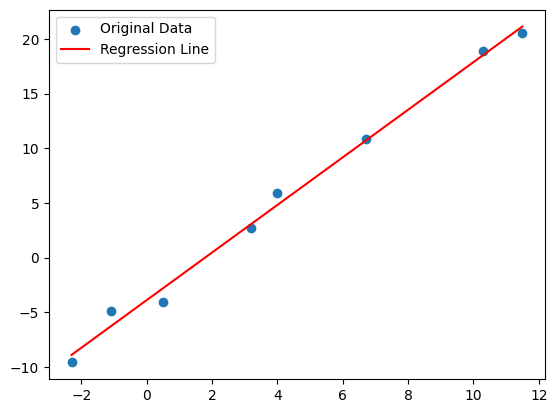

In [12]:
show_reg(x1,y1,reg1)

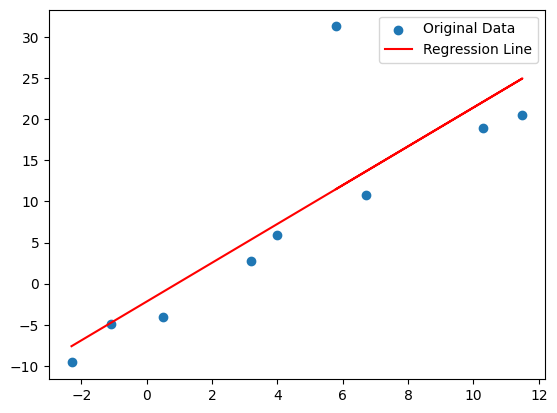

In [13]:
show_reg(x2,y2,reg2)

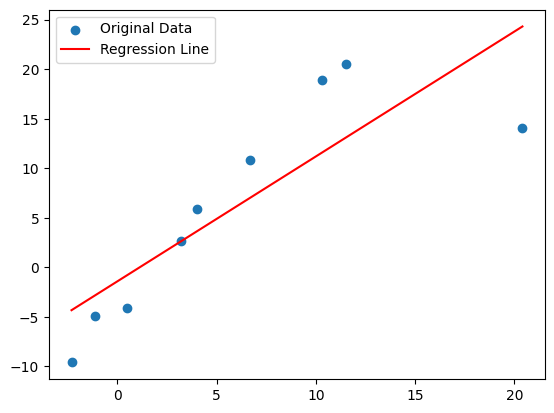

In [14]:
show_reg(x3,y3,reg3)

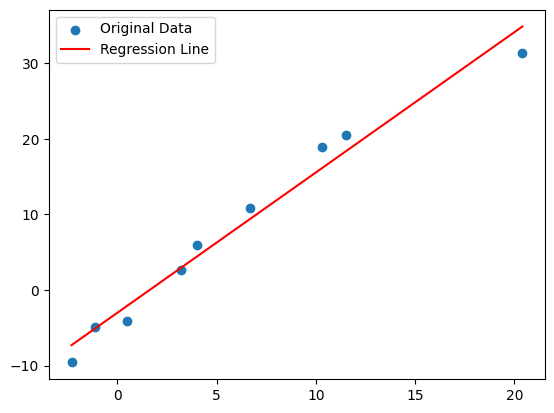

In [15]:
show_reg(x4,y4,reg4)


If we want to use the formula to calculate the $R^2$, we have:
> $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{\sum_{i=1}^{n} (y_i - \hat{{y}_i})^2}
 $$


In this formula:
*   n is the number of data points.
*   $ y_i $ is the actual value for the $ i$-th data point.
*   $\bar y$ is the mean of the actual values.
*   $\hat{{y}_i}$ is the predicted value for the $i$-th data point.




In [16]:
mean_y1 = np.mean(y1)
mean_y2 = np.mean(y2)
mean_y3 = np.mean(y3)
mean_y4 = np.mean(y4)

r1 = 1 - np.sum((y1 - reg1)**2) / np.sum((y1 - mean_y1)**2)
r2 = 1 - np.sum((y2 - reg2)**2) / np.sum((y2 - mean_y2)**2)
r3 = 1 - np.sum((y3 - reg3)**2) / np.sum((y3 - mean_y3)**2)
r4 = 1 - np.sum((y4 - reg4)**2) / np.sum((y4 - mean_y4)**2)

print(r1)
print(r2)
print(r3)
print(r4)

0.9931142293628097
0.6943381680789323
0.7069879724740986
0.9738367949787371


And this is the result with pre-built function 'r2_score':

In [17]:
from sklearn.metrics import r2_score

r_squared1 = r2_score(y1, reg1)
r_squared2 = r2_score(y2, reg2)
r_squared3 = r2_score(y3, reg3)
r_squared4 = r2_score(y4, reg4)

print(r_squared1)
print(r_squared2)
print(r_squared3)
print(r_squared4)

0.9931142293628097
0.6943381680789323
0.7069879724740986
0.9738367949787371


## **2_4:**

When dealing with outliers or high leverage points in a regression analysis, the traditional least squares method can be sensitive to these extreme values, leading to a model that might not accurately represent the majority of the data. There are alternative methods and techniques that are more robust to outliers. Here are some approaches:



**1.   Robust Regression:**



> Methods like Huber regression or RANSAC (Random Sample Consensus) are more robust to outliers. These methods downweight the influence of outliers during the fitting process, providing a more reliable estimate.



**2.   Weighted Least Squares:**


> Assigning different weights to different data points based on their influence allows the model to give less importance to outliers. Data points with higher weights have a stronger influence on the model.


**3.   L1 Regularization (LASSO):**



> L1 regularization penalizes the absolute values of the coefficients, which tends to force some coefficients to be exactly zero. This can help in variable selection and make the model less sensitive to outliers.


**4.   Ridge Regression (L2 Regularization):**


> Ridge regression penalizes the sum of squared coefficients. It can be less sensitive to multicollinearity and outliers compared to standard least squares. The regularization term penalizes the model for having large coefficients. The larger the coefficients, the larger the penalty.



**5.   Tukey's Biweight Midvariance:**



> This is a robust measure of scale (variation) that is less influenced by outliers compared to the standard variance. It can be used in robust regression techniques.


**6.   Quantile Regression:**



> Instead of modeling the mean of the response variable, quantile regression models different quantiles. It is less sensitive to extreme values in the response variable.



**7.   Data Transformation:**


> Transforming the data using functions like logarithms or Box-Cox transformations can sometimes make the relationship more linear and reduce the impact of outliers.


**8.   Data Trimming:**



> Removing or downweighting the most extreme values in the dataset can sometimes help mitigate the influence of outliers.



# <b><font color='green'>Part3:</font></b> Central Limit Theorem & Sampling

loading dataset:

In [18]:
import pandas as pd

df = pd.read_csv('FIFA2020.csv', encoding = "ISO-8859-1")
# display(df)

## **3_1:**

Each method of replacing NaN values has its own pros and cons. Here's an overview:


**1.   Replace NaN using Backward Fill (Fill NaN with the Next Value):**

*   **Pros:**

> Preserves the general trend in the data.

> Suitable for time series data where the next value might be a good estimate of the missing value.

*   **Cons:**

> Not suitable if NaN values occur at the end of the dataset since there are no subsequent values.

**2.   Replace NaN using Forward Fill (Fill NaN with the Previous Value):**

*   **Pros:**

> Preserves the general trend in the data.

> Suitable for time series data where the previous value might be a good estimate of the missing value.

*   **Cons:**

> Not suitable if NaN values occur at the beginning of the dataset since there are no previous values.




**3.   Replacing NaN with Min or Max Value of the Column:**

*   **Pros:**

> Simple and easy to implement.

> Preserves the structure of the data.

> Suitable if min or max values are meaningful bounds.

*   **Cons:**

> May not be suitable if min or max values are outliers or if NaN values have a different cause.

> Can introduce bias if min or max values are not reasonable replacements for the missing values.

**4.   Replace NaN with the Mean of the Column:**

*   **Pros:**

> Simple and easy to implement.

> Suitable for datasets with a normal distribution and no extreme values.

*   **Cons:**

> Sensitive to extreme values (outliers).

> May distort the distribution of the data if it is not normally distributed.

**5.   Replace NaN with the Median of the Column:**

*   **Pros:**


> Robust to outliers, making it less sensitive to extreme values.

> Appropriate for datasets with skewed distributions or presence of outliers.

> Maintains the overall central tendency of the data.

*   **Cons:**

> Ignores the potential relationships between variables, which may lead to less accurate imputation in some cases.



**6.  Replace NaN with a Constant Value (like zero):**

*   **Pros:**

> Preserves the structure of the data.

> Suitable if zero is a meaningful or neutral value.


*   **Cons:**



> May introduce bias if zero is not a reasonable replacement for the missing values.

> If zero is a valid data value, it might be difficult to distinguish between actual zero values and imputed zero values.






Replace NaN using Backward Fill (Fill NaN with the Next Value):

In [19]:
# df['column_name'] = df['column_name'].fillna(method='bfill')

Replace NaN using Forward Fill (Fill NaN with the Previous Value):

In [20]:
# df['column_name'] = df['column_name'].fillna(method='ffill')

Replace NaN with the Min or Max of the Column:

In [21]:
# df['column_name'] = df['column_name'].fillna(df['column_name'].min())
# df['column_name'] = df['column_name'].fillna(df['column_name'].max())

Replace NaN with the Mean of the Column:

In [22]:
# df['column_name'] = df['column_name'].fillna(df['column_name'].mean())

Replace NaN with the Median of the Column:

In [23]:
# df['column_name'] = df['column_name'].fillna(df['column_name'].median())

Replace NaN with a Constant Value:

In [24]:
# df['column_name'] = df['column_name'].fillna(value)

So, based on the explanations that I provided, I think it is better to replace NaN with the median of the column.

In [25]:
df['pace'] = df['pace'].fillna(df['pace'].median())
df['dribbling'] = df['dribbling'].fillna(df['dribbling'].median())

print(f"The median for 'pace' is: {df['pace'].median()}")
print(df['pace'])
print(f"The median for 'dribbling' is: {df['dribbling'].median()}")
print(df['dribbling'])

The median for 'pace' is: 71.0
0        95.0
1        92.0
2        97.0
3        96.0
4        88.0
         ... 
21556    88.0
21557    80.0
21558    71.0
21559    71.0
21560    96.0
Name: pace, Length: 21561, dtype: float64
The median for 'dribbling' is: 65.0
0        96.0
1        97.0
2        95.0
3        95.0
4        95.0
         ... 
21556    88.0
21557    73.0
21558    65.0
21559    65.0
21560    86.0
Name: dribbling, Length: 21561, dtype: float64


## **3_2:**

Min (Minimum): The smallest value in your dataset.

Q1 (First Quartile): The median of the lower half of the dataset.

Q2 (Second Quartile): The median of the entire dataset.

Q3 (Third Quartile): The median of the upper half of the dataset.

Max (Maximum): The largest value in your dataset.

<ipython-input-26-70eb6907a603>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


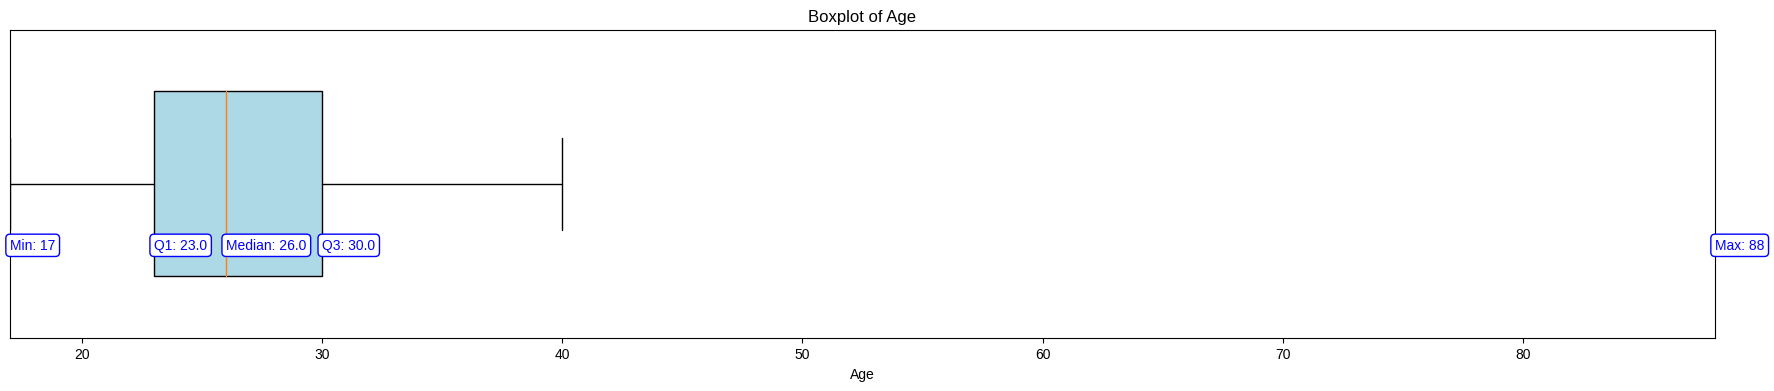

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

age_data = df['age']

min_val = age_data.min()
q1 = age_data.quantile(0.25)
median_val = age_data.median()
q3 = age_data.quantile(0.75)
max_val = age_data.max()

fig, ax = plt.subplots(figsize=(22, 4))

plt.style.use('seaborn-whitegrid')

# Show boxplot with statistics
box = ax.boxplot(age_data, vert=False, patch_artist=True, widths=0.6, sym='')

# Customize colors
box_colors = ['lightblue']
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

# Add labels and title
ax.set_xlabel('Age')
ax.set_title('Boxplot of Age')

# Add statistics annotations
annotation_style = dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3')

ax.text(min_val, 0.8, f'Min: {min_val}', va='center', ha='left', color='blue', bbox=annotation_style)
ax.text(q1, 0.8, f'Q1: {q1}', va='center', ha='left', color='blue', bbox=annotation_style)
ax.text(median_val, 0.8, f'Median: {median_val}', va='center', ha='left', color='blue', bbox=annotation_style)
ax.text(q3, 0.8, f'Q3: {q3}', va='center', ha='left', color='blue', bbox=annotation_style)
ax.text(max_val, 0.8, f'Max: {max_val}', va='center', ha='left', color='blue', bbox=annotation_style)

# Set x-axis limits to show the entire range
ax.set_xlim(min_val, max_val)

# Customize y-axis ticks
ax.set_yticks([])  # Remove y-axis ticks

# Show the plot
plt.show()


## **3_3:**

### **3_3_1:**

In [27]:
weight_data = df['weight']
set_seed(810109203)
selected_weights = np.random.choice(weight_data, size=100, replace=False)
print(selected_weights)

[68 80 81 80 75 76 95 85 72 70 70 86 79 60 76 79 72 73 66 86 69 84 87 82
 80 83 81 77 79 71 75 69 85 84 68 65 70 77 65 82 77 75 61 93 76 76 80 82
 89 67 69 75 75 74 78 85 81 75 76 75 82 68 93 72 71 76 77 70 75 83 70 87
 76 86 84 72 74 80 84 81 74 86 72 75 78 84 76 67 64 73 75 79 75 68 85 60
 84 64 85 84]


In [28]:
mean_sel_weights = np.mean(selected_weights)
var_sel_weights = np.var(selected_weights)
std_sel_weights = np.std(selected_weights)

print(f"The mean is: {mean_sel_weights}")
print(f"The var is: {var_sel_weights}")
print(f"The std is: {std_sel_weights}")

The mean is: 76.7
The var is: 53.07
The std is: 7.284915922644544


### **3_3_2:**

A Q-Q (Quantile-Quantile) plot is used to visually assess whether a dataset follows a particular theoretical distribution by comparing the quantiles of the observed data against the quantiles of the expected theoretical distribution.

### **3_3_3:**

In [29]:
set_seed(810109203)
sample_weights = np.random.normal(mean_sel_weights, std_sel_weights, size = 100)
print(sample_weights)
# print(selected_weights)

[89.06005667 73.89723976 80.22984702 92.52685109 83.83506158 65.52269019
 73.93353475 87.41342942 77.11443117 84.57592109 75.40008442 83.92472634
 72.78596148 76.39889032 72.1333299  71.20057021 69.92902176 72.20384539
 80.22077771 67.116617   80.61520539 71.59448696 67.06470251 67.12591472
 72.18560952 68.34036999 74.10868426 74.7556231  78.65049868 77.91889336
 69.16488621 76.39845759 74.61433534 82.35163561 61.64563231 85.72816062
 82.93432621 83.9462106  68.54478441 71.33147475 76.320527   70.49378352
 80.16874216 80.20475372 70.99025542 82.03891225 85.79309163 68.22880754
 73.46916257 53.72362081 68.7060118  59.09883196 71.48110123 75.43622219
 72.60803917 73.57932487 74.95829106 77.34382553 78.30898324 80.26940801
 83.43210391 94.9446109  68.03398809 88.15852876 70.13494868 79.8165846
 86.82751807 74.42598075 79.89982096 75.77858211 69.52612418 77.88294769
 69.3909471  87.44213082 85.96773541 61.98523469 69.7266339  86.70463113
 65.12386303 79.90275651 85.93348248 86.40249732 71.

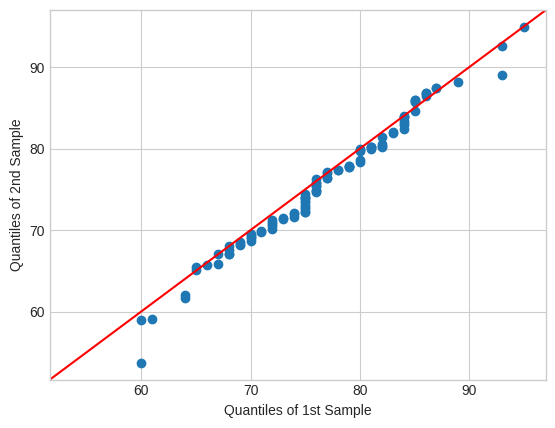

In [30]:
import statsmodels.api as sm
sm.qqplot_2samples(selected_weights, sample_weights, line='45')
plt.show()

As you can see, when the points closely follow the 45-degree line, it suggests that your sample distribution is in good agreement with the normal distribution. This is a positive outcome, indicating that your data exhibits a pattern similar to what would be expected from a normal distribution.

### **3_3_4:**

In [31]:
statistic, p_value = stats.shapiro(selected_weights)
print(f"The p_value is: {p_value}")

The p_value is: 0.5503065586090088


The Shapiro-Wilk test for normality yields a p-value of approximately 0.55, significantly exceeding the conventional significance level of 0.05. This suggests that there is no substantial evidence to reject the null hypothesis of normality. Therefore, we can reasonably conclude that the distribution of 'selected_weights' and, consequently, the distribution of 'weights,' follows a normal distribution.

### **3_3_5:**

#### For n = 500:

In [32]:
n = 500
set_seed(810109203)
selected_weights = np.random.choice(weight_data, size = n, replace=False)

mean_sel_weights = np.mean(selected_weights)
var_sel_weights = np.var(selected_weights)
std_sel_weights = np.std(selected_weights)

print(f"The mean is: {mean_sel_weights}")
print(f"The var is: {var_sel_weights}")
print(f"The std is: {std_sel_weights}")

The mean is: 76.0
The var is: 54.236
The std is: 7.364509488078618


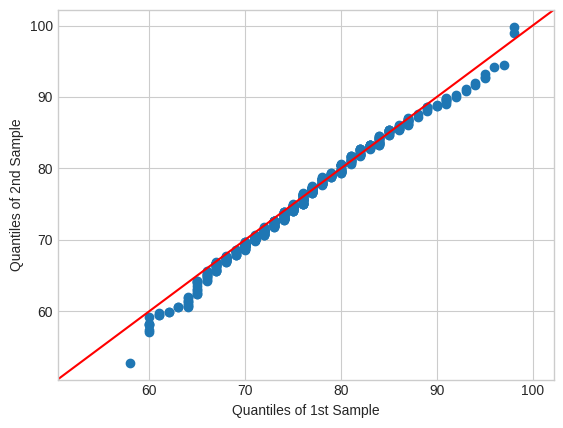

In [33]:
set_seed(810109203)
sample_weights = np.random.normal(mean_sel_weights, std_sel_weights, size = n)

sm.qqplot_2samples(selected_weights, sample_weights, line='45')
plt.show()

In [34]:
statistic, p_value = stats.shapiro(selected_weights)
print(f"The p_value is: {p_value}")

The p_value is: 0.0013178142253309488


As evident from the results, as the number of samples increases, the p-value decreases to 0.04, which is less than the conventional significance level of 0.05.

#### For n = 2000:

In [35]:
n = 2000
set_seed(810109203)
selected_weights = np.random.choice(weight_data, size = n, replace=False)

mean_sel_weights = np.mean(selected_weights)
var_sel_weights = np.var(selected_weights)
std_sel_weights = np.std(selected_weights)

print(f"The mean is: {mean_sel_weights}")
print(f"The var is: {var_sel_weights}")
print(f"The std is: {std_sel_weights}")

The mean is: 75.548
The var is: 51.687695999999995
The std is: 7.189415553436872


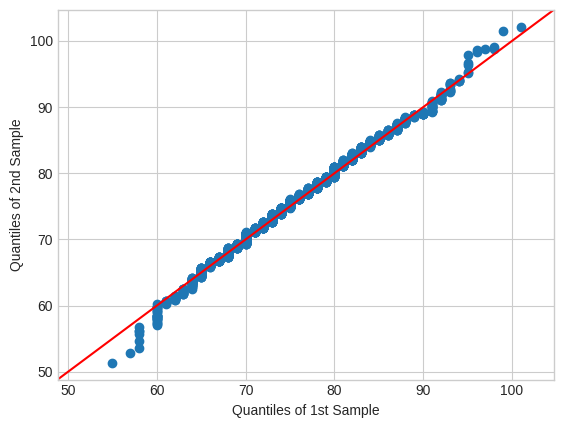

In [36]:
set_seed(810109203)
sample_weights = np.random.normal(mean_sel_weights, std_sel_weights, size = n)

sm.qqplot_2samples(selected_weights, sample_weights, line='45')
plt.show()

In [37]:
statistic, p_value = stats.shapiro(selected_weights)
print(f"The p_value is: {p_value}")

The p_value is: 2.6769496841438922e-08


It's important to note that as the size of our samples increases, the p-value yielded by the Shapiro-Wilk test may decrease. This phenomenon occurs because with larger sample sizes, the test becomes more sensitive and might detect even minor departures from normality. Therefore, while our current sample suggests a distribution close to normal, the interpretation may change with larger samples due to increased test sensitivity.

It highlights the point that larger sample sizes can lead to increased sensitivity in detecting deviations from normality, even if those deviations are small. It's a common phenomenon in statistical testing.

## **3_4:**

### **3_4_1:**

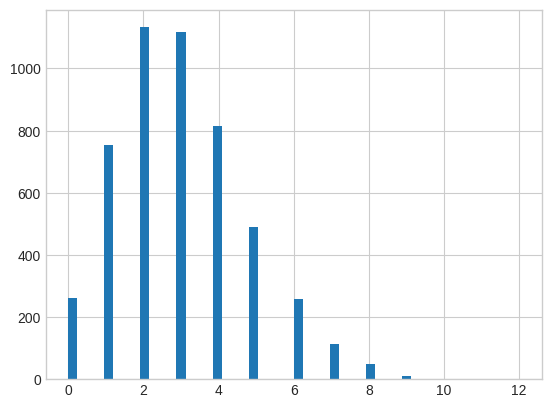

In [45]:
lmbda = 3
n = 5000
set_seed(810109203)
poi_sample = np.random.poisson(lmbda, n)

plt.hist(poi_sample, bins = 50)
plt.show()
# print(poi_sample)

### **3_4_2:**

In [46]:
def poiCLT(lmbda, n):
  set_seed(810109203)
  poisson_data = np.random.poisson(lmbda, n)

  mean = np.mean(poisson_data)
  std = np.std(poisson_data)

  normal_sample = np.random.normal(mean, std, size = n)

  sm.qqplot_2samples(poisson_data, normal_sample, line='45')
  plt.show()

  statistic, p_value = stats.shapiro(poisson_data)
  print(f"The p_value is: {p_value}")

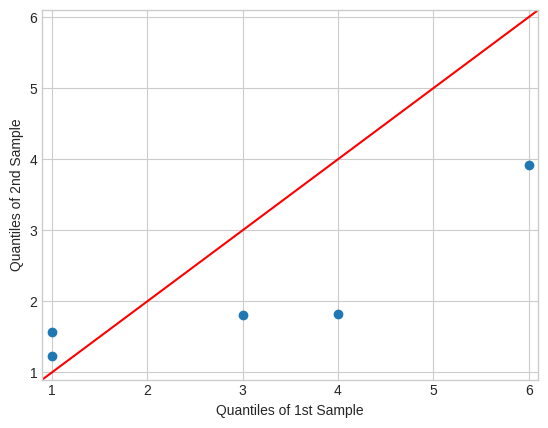

The p_value is: 0.4677392542362213


In [47]:
poiCLT (3, 5)

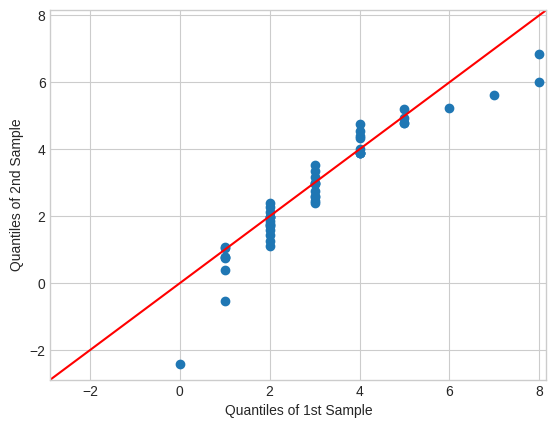

The p_value is: 0.0008148230845108628


In [41]:
poiCLT (3, 50)

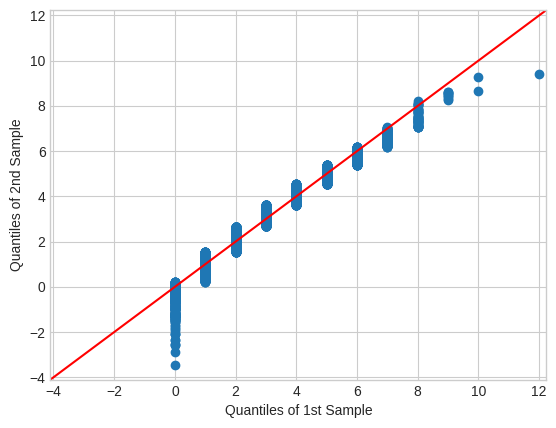

The p_value is: 1.7393666233878043e-38


In [42]:
poiCLT (3, 5000)

As you can see, for n = 5, the p-value is around 0.46, which is greater than 0.05, suggesting that our distribution somewhat follows a normal distribution. However, as the number of samples increases, the p-value decreases, reaching below 0.05. This indicates that the distribution deviates from normality in larger sample sizes.

This phenomenon is likely due to the increased sensitivity of statistical tests with larger samples. While small deviations from normality might not be detected with a small sample, a larger sample size allows the test to identify even minor departures.

🙏 Thanks for your attention!

👋 My name is Alireza Karimi.

🔢 My SID is 810101492.

🌞 Hope you have a great day :)
